In [12]:
from netCDF4 import Dataset as netDataset
import os
import xarray as xr
from datetime import timedelta, date, datetime
from tqdm import tqdm
import time
import numpy as np
import data_processing_tool as dpt


file_ACCESS_dir="E:/climate/access-s1/"
file_BARRA_dir="C:/Users/JIA059/barra/"
# file_ACCESS_dir="H:/climate/access-s1/"
# file_BARRA_dir="D:/dataset/accum_prcp/"
# file_BARRA_dir_an="F:/climate/BARRA/"
# file_BARRA_dir="/g/data/ma05"
ensemble=['e01','e02']

# ensemble=['e01','e02','e03','e04','e05','e06','e07','e08','e09','e10','e11']

lat_name = "lat"
lon_name = "lon"
var_name="pr"
leading_time=217
leading_time_we_use=31

domain=[111.85, 155.875, -44.35,  -9.975] #awap
domain=[112.9, 154.00, -43.7425, -9.0] #DEM

domain=[112.9, 154.25, -43.7425, -9.0]# adapted DEM

# '''
# demo_date=date(1990,1,9)
# idx=7
# 漂移严重

# '''

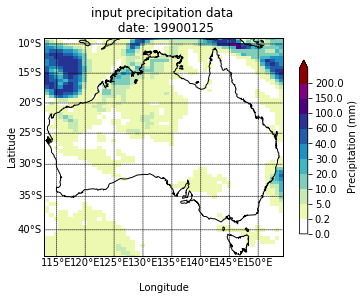

324 432


In [13]:
#demo input precipitation data
demo_date=date(1990,1,25)
idx=0
ensamble_demo="e01"
filename=file_ACCESS_dir+'pr/daily/'+ensamble_demo+"/da_pr_"+demo_date.strftime("%Y%m%d")+"_"+ensamble_demo+".nc"

title="input precipitation data \n date: "+(demo_date+timedelta(idx)).strftime("%Y%m%d")
prec_in=dpt.read_access_data(filename,idx=idx)*86400

dpt.draw_aus_old(prec_in,title=title,domain=domain)
print(prec_in.shape[0],prec_in.shape[1])

In [8]:
a=dpt.map_aust(prec_in)

print(a.shape[0],a.shape[1])

62 54


In [ ]:
#plot DEM data

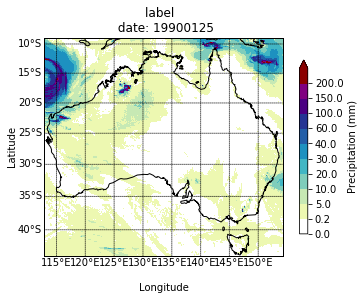

79.0 94.0


In [11]:
#demo corresponding label data
domain=[112.9, 154.25, -43.7425, -9.0] #DEM
label=dpt.read_barra_data_fc(file_BARRA_dir,(demo_date+timedelta(1)),nine2nine=True,date_minus_one=1)
title="label  \n date: "+(demo_date+timedelta(idx)).strftime("%Y%m%d")

# dpt.draw_aus(label,title=title)
a=dpt.map_aust(label,domain=domain)
dpt.draw_aus_old(label,title=title,domain=domain)
print(a.shape[0]/4,a.shape[1]/4)

In [ ]:

label=dpt.read_barra_data_an(file_BARRA_dir,(demo_date+timedelta(idx)),nine2nine=False)
title="label  \n date: "+(demo_date+timedelta(idx)).strftime("%Y%m%d")
dpt.draw_aus_old(label,title=title)
label.shape

In [ ]:
# label.data.shape
b=time.time()
for i in range(1000000):
    np.reshape(label.data,(768,1200,1,1))
#     np.expand_dims(label.data,axis=3)
print(b-time.time())

# np.reshape(label.data,(768,1200,1,1))

In [2]:
#dem
data=dpt.read_dem("../DEM/dem-9s1.tif")

    
    

In [4]:
print(data[:,:,0].shape)
import xarray as xr
def add_lat_lon(data,domian=[112.9, 154.00, -43.7425, -9.0],xarray=True):
    "data: is the something you want to add lat and lon, with first demenstion is lat,second dimention is lon "
    new_lon=np.linspace(domian[0],domian[1],data.shape[1])
    new_lat=np.linspace(domian[2],domian[3],data.shape[0])
    if xarray:
        return xr.DataArray(data[:,:,0],coords=[new_lat,new_lon],dims=["lat","lon"])
    else:
        return data,new_lat,new_lon

data_dem=add_lat_lon(data)
data_dem=dpt.map_aust_old(data_dem,xrarray=False)

(13897, 16440)


In [5]:
print(data_dem.shape)

(13507, 16440)


In [1]:
batch=1
print("Train for batch %d"%batch)

Train for batch 1
